<a href="https://colab.research.google.com/github/BountyHunter1999/Machine-Learning-Zoom-Camp/blob/main/Homeworks/Homework%20%234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 4

Use this notebook as a starter

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-04 02:20:59--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.4’

CreditScoring.csv.4 100%[===================>] 178.21K  --.-KB/s    in 0.03s   

2021-10-04 02:21:00 (6.14 MB/s) - ‘CreditScoring.csv.4’ saved [182489/182489]



## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

Some of the features are encoded as numbers. Use the following code to de-code them:

In [4]:
df.status.map?

In [5]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [6]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [7]:
df.replace?

In [7]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [8]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [9]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [10]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [11]:
df['default'] = (df.status == 'default').astype(int) # default value is either T or F
del df['status']

In [12]:
df['default'].value_counts()

0    3200
1    1254
Name: default, dtype: int64

## Your code

What are the categorical variables? What are the numerical?

In [13]:
df.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default'],
      dtype='object')

In [14]:
df.dtypes

seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
default       int64
dtype: object

**CATEGORICAL**

In [15]:
cat_cols = list(df.dtypes[df.dtypes == "object"].index)
cat_cols

['home', 'marital', 'records', 'job']

**NUMERICAL**

In [16]:
num_cols = list(df.dtypes[df.dtypes != "object"].index)
num_cols.remove("default")
num_cols

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_test_split?

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [20]:
y_train = df_train["default"]
y_val = df_val["default"]
y_test = df_test["default"]

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
df_full_train = df_full_train.reset_index(drop=True)

In [23]:
del df_train["default"]
del df_val["default"]
del df_test["default"]

In [24]:
df_train.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [25]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the default variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [26]:
from sklearn.metrics import roc_auc_score

In [28]:
roc_auc_score?

`print(num, round(roc_auc_score( df["default"], df[num]),3))`

here default is our output so,


In [27]:
for num in num_cols:
  print(num, round(roc_auc_score( df["default"], df[num]),3))

seniority 0.303
time 0.554
age 0.442
expenses 0.502
income 0.333
assets 0.367
debt 0.493
amount 0.595
price 0.5


**Actual Solution**

In [28]:
for num in num_cols:
  print(num, round(roc_auc_score( y_train, df_train[num]),3))

seniority 0.291
time 0.561
age 0.427
expenses 0.499
income 0.318
assets 0.351
debt 0.495
amount 0.591
price 0.504


In [29]:
for num in num_cols:
  if  round(roc_auc_score( y_train, df_train[num]),3) < 0.5:
    print(num,"-ve correlation", round(roc_auc_score( y_train, -df_train[num]),3))
  else:
    print(num, round(roc_auc_score( y_train, df_train[num]),3))

seniority -ve correlation 0.709
time 0.561
age -ve correlation 0.573
expenses -ve correlation 0.501
income -ve correlation 0.682
assets -ve correlation 0.649
debt -ve correlation 0.505
amount 0.591
price 0.504


In [30]:
for num in num_cols:
  print(num, round(roc_auc_score( y_train, -df_train[num]),3))

seniority 0.709
time 0.439
age 0.573
expenses 0.501
income 0.682
assets 0.649
debt 0.505
amount 0.409
price 0.496


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [31]:
cols = ['seniority', 'income', 'assets', 'records', 'job', 'home']

In [32]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [33]:
cat_cols, num_cols

(['home', 'marital', 'records', 'job'],
 ['seniority',
  'time',
  'age',
  'expenses',
  'income',
  'assets',
  'debt',
  'amount',
  'price'])

In [34]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[cols].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
val_dict = df_val[cols].to_dict(orient="records")
val_dict[:2]

[{'assets': 30000,
  'home': 'owner',
  'income': 178,
  'job': 'freelance',
  'records': 'yes',
  'seniority': 15},
 {'assets': 4000,
  'home': 'owner',
  'income': 184,
  'job': 'fixed',
  'records': 'no',
  'seniority': 2}]

In [36]:
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:,1]

In [37]:
round(roc_auc_score(y_val, y_pred),3)

0.812

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812 (this)

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [38]:
np.linspace?

In [38]:
thres = np.linspace(0,1,101)
thres[::10]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## Precision:(Counted with the predicted T values
## Recall: (Counted with the actual T values)

In [39]:
y_val.value_counts()

0    645
1    246
Name: default, dtype: int64

In [40]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [41]:
scores = []
for t in thres:
  pred_positive = (y_pred >= t)
  pred_negative = (y_pred < t)

  tp = (actual_positive & pred_positive).sum()
  tn = (actual_negative & pred_negative).sum()

  fp = (actual_negative & pred_positive).sum()
  fn = (actual_positive & pred_negative).sum()

  scores.append([t, tp, fp, fn, tn])

In [42]:
columns = ['threshold',  "tp", "fp", "fn", "tn"]
df_scores = pd.DataFrame(scores, columns=columns)

df_scores["precision"] = df_scores.tp / (df_scores.tp + df_scores.fp) 
df_scores["recall"] = df_scores.tp / (df_scores.tp + df_scores.fn) 

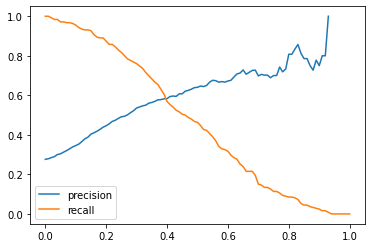

In [43]:
plt.plot(df_scores.threshold, df_scores['precision'], label='precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='recall')
plt.legend()

At which threshold precision and recall curves intersect?

* 0.2
* 0.4 this
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [44]:
df_scores["f1_score"] = 2 * (df_scores["precision"] * df_scores["recall"]) / (df_scores["precision"] + df_scores["recall"])

In [47]:
df_scores.sort_values(['f1_score'], ascending = False)[:5]

,threshold,tp,fp,fn,tn,precision,recall,f1_score
30,0.30,187,162,59,483,0.535817,0.760163,0.628571
31,0.31,184,156,62,489,0.541176,0.747967,0.627986
32,0.32,181,150,65,495,0.546828,0.735772,0.627383
34,0.34,172,135,74,510,0.560261,0.699187,0.622061
33,0.33,176,144,70,501,0.550000,0.715447,0.621908


In [45]:
df_scores[df_scores["f1_score"] == df_scores["f1_score"].max()]

,threshold,tp,fp,fn,tn,precision,recall,f1_score
30,0.3,187,162,59,483,0.535817,0.760163,0.628571


At which threshold F1 is maximal?

- 0.1
- 0.3 this
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [48]:
cols

['seniority', 'income', 'assets', 'records', 'job', 'home']

In [50]:
def train(df_train, y_train, C=1.0):
  dicts = df_train[cols].to_dict(orient="records")
  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(solver='liblinear',C=C, max_iter=1000)
  model.fit(X_train, y_train)

  return dv,model

In [51]:
def predict(df, dv, model):
  dicts = df[cols].to_dict(orient="records")
  
  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:,1]
  
  return y_pred

In [52]:
!pip install tqdm

For timing our loop process

In [53]:
from tqdm.auto import tqdm

In [54]:
from sklearn.model_selection import KFold

In [55]:
type(y_train)

pandas.core.series.Series

In [56]:
n_splits = 5

In [58]:
df_full_train[:4]

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,5,private,60,24,married,no,fixed,45,127,2000,0,1000,1282,0
1,14,parents,60,32,married,yes,fixed,35,140,0,0,1150,1273,0
2,25,owner,12,43,married,no,freelance,75,250,100000,0,600,841,0
3,18,rent,60,37,married,no,fixed,70,100,0,0,1300,1345,0


In [65]:
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]

  y_train = df_train.default.values
  y_val = df_val.default.values

  dv,model = train(df_train, y_train, C=1)
  pred = predict(df_val, dv , model)

  auc = roc_auc_score(y_val, pred) # target, data
  scores.append(auc)

print(f"mean:{np.mean(scores):.3f}, standard Deviation:{np.std(scores):.3f}")

mean:0.812, standard Deviation:0.014


How large is standard devidation of the scores across different folds?

- 0.001
- 0.014 THIS
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std

In [60]:
df_full_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,5,private,60,24,married,no,fixed,45,127,2000,0,1000,1282,0
1,14,parents,60,32,married,yes,fixed,35,140,0,0,1150,1273,0
2,25,owner,12,43,married,no,freelance,75,250,100000,0,600,841,0
3,18,rent,60,37,married,no,fixed,70,100,0,0,1300,1345,0
4,1,parents,48,24,single,yes,fixed,35,65,0,0,900,1061,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,31,owner,48,57,married,yes,freelance,60,230,19400,1781,600,887,0
3559,19,owner,60,46,married,no,freelance,60,190,7000,0,1500,2755,0
3560,15,owner,60,55,married,no,freelance,60,0,6500,3650,1200,1710,0
3561,12,rent,48,36,married,no,fixed,80,195,0,0,1800,2272,0


In [61]:
n_splits = 5
for C in tqdm([0.01, 0.1, 1, 10]):
  kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
  scores = []

  for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.default.values
    y_val = df_val.default.values

    dv,model = train(df_train, y_train, C=C)
    pred = predict(df_val, dv , model)

    auc = roc_auc_score(y_val, pred) # target, data
    scores.append(auc)

  print(f"for C={C} \t mean:{np.mean(scores):.3f}\t standard Deviation:{np.std(scores):.3f}")

  0%|          | 0/4 [00:00<?, ?it/s]

for C=0.01 	 mean:0.808	 standard Deviation:0.012
for C=0.1 	 mean:0.813	 standard Deviation:0.014
for C=1 	 mean:0.812	 standard Deviation:0.014
for C=10 	 mean:0.814	 standard Deviation:0.015


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10 this

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.